# Training a Model for ASL Recognation

Using Multi- layerd Convolutional Neural Network


### Part I - Building the CNN

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers

In [2]:
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding 2nd Convolution layer
classifier.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
classifier.add(MaxPooling2D(pool_size =(2,2)))

#Adding 3rd Convolution Layer
classifier.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
classifier.add(MaxPooling2D(pool_size =(2,2)))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full Connection
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(26, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Part II - Fittting the CNN to the image

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
training_set = train_datagen.flow_from_directory(
        'training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit(
        training_set,
        steps_per_epoch=800,
        epochs=25,
        validation_data = test_set,
        validation_steps = 6500
      )


Found 45500 images belonging to 26 classes.
Found 6500 images belonging to 26 classes.
Epoch 1/25
800/800 [==============================] - 432s 540ms/step - loss: 1.9829 - accuracy: 0.3965 - val_loss: 0.4893 - val_accuracy: 0.8882
Epoch 2/25
800/800 [==============================] - 234s 292ms/step - loss: 0.6460 - accuracy: 0.7867
Epoch 3/25
800/800 [==============================] - 191s 239ms/step - loss: 0.4028 - accuracy: 0.8622
Epoch 4/25
800/800 [==============================] - 124s 155ms/step - loss: 0.3126 - accuracy: 0.8922
Epoch 5/25
800/800 [==============================] - 114s 143ms/step - loss: 0.2622 - accuracy: 0.9095
Epoch 6/25
800/800 [==============================] - 96s 119ms/step - loss: 0.2118 - accuracy: 0.9278
Epoch 7/25
800/800 [==============================] - 94s 118ms/step - loss: 0.1799 - accuracy: 0.9364
Epoch 8/25
800/800 [==============================] - 87s 108ms/step - loss: 0.1740 - accuracy: 0.9396
Epoch 9/25
800/800 [======================

### Part III - Saving and Using the model

In [5]:
import h5py
classifier.save('Trained_model.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


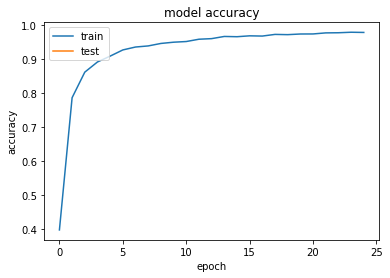

In [6]:
print(model.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

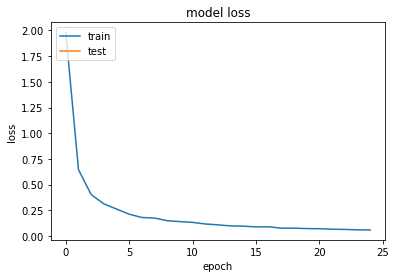

In [7]:
# summarize history for loss

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()